In [12]:
import requests
import json
from Resources.API_Key import api_key
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Using the API key to access BLS data   
url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"

series_id_lp = "PRS85006092"

payload = {
    "seriesid": [series_id_lp],
    "startyear": "2018",
    "endyear": "2024",
    "registrationkey": api_key
}

response = requests.post(url, json=payload)

if response.status_code == 200:
    data = response.json()
    print(json.dumps(data, indent=4))
else:
    print(f"Error {response.status_code}")
    

{
    "status": "REQUEST_SUCCEEDED",
    "responseTime": 158,
    "message": [],
    "Results": {
        "series": [
            {
                "seriesID": "PRS85006092",
                "data": [
                    {
                        "year": "2024",
                        "period": "Q03",
                        "periodName": "3rd Quarter",
                        "latest": "true",
                        "value": "2.2",
                        "footnotes": [
                            {}
                        ]
                    },
                    {
                        "year": "2024",
                        "period": "Q02",
                        "periodName": "2nd Quarter",
                        "value": "2.1",
                        "footnotes": [
                            {
                                "code": "R",
                                "text": "revised"
                            }
                        ]
                    },
   

In [16]:
# Converting the data into a dataframe
series_data = data['Results']['series'][0]['data']
labor_productivity_df = pd.DataFrame(series_data)

# Formatting the data
quarter_mapping = {
    "Q01": "Q1: Jan 1 - Mar 31",
    "Q02": "Q2: Apr 1 - Jun 30",
    "Q03": "Q3: Jul 1 - Sep 30",
    "Q04": "Q4: Oct 1 - Dec 31"
}

# Extra formatting for the data that came from the API request
labor_productivity_df['quarter'] = labor_productivity_df['period'].map(quarter_mapping)
labor_productivity_df['year'] = pd.to_numeric(labor_productivity_df['year'])
labor_productivity_df['percent_change'] = pd.to_numeric(labor_productivity_df['value'])
labor_productivity_df = labor_productivity_df[['year', 'quarter', 'percent_change']]
labor_productivity_df = labor_productivity_df.sort_values(by=['year', 'quarter']).reset_index(drop=True)

In [59]:
# Reading in the Excel file that was used for this data frame
file_path = "Resources/unit_labor_costs.xlsx"
sheet_name = "BLS Data Series"
unit_labor_costs_df = pd.read_excel(file_path)
unit_labor_costs_df = unit_labor_costs_df.melt(id_vars =["Year"],
                                               var_name="quarter",
                                               value_name="percent_change")

#Formatting the data so that it matches the previous data frame
quarter_mapping2 = {
    "Qtr1": "Q1: Jan 1 - Mar 31",
    "Qtr2": "Q2: Apr 1 - Jun 30",
    "Qtr3": "Q3: Jul 1 - Sep 30",
    "Qtr4": "Q4: Oct 1 - Dec 31"
}
unit_labor_costs_df["quarter"] = unit_labor_costs_df["quarter"].map(quarter_mapping2)
unit_labor_costs_df = unit_labor_costs_df.sort_values(by=["Year", "quarter"]).reset_index(drop=True)
unit_labor_costs_df = unit_labor_costs_df.dropna(subset=["percent_change"])

In [20]:
# Rinse and repeat for the next excel sheet
file_path2 = "Resources/real_hourly_compensation.xlsx"
sheet_name2 = sheet_name
real_hourly_compensation_df = pd.read_excel(file_path2)
real_hourly_compensation_df = real_hourly_compensation_df.melt(id_vars = ["Year"],
                                                               var_name="quarter",
                                                               value_name="percent_change")

real_hourly_compensation_df["quarter"] = real_hourly_compensation_df["quarter"].map(quarter_mapping2)
real_hourly_compensation_df = real_hourly_compensation_df.sort_values(by=["Year", "quarter"]).reset_index(drop=True)
real_hourly_compensation_df = real_hourly_compensation_df.dropna(subset=["percent_change"])

In [22]:
file_path3 = "Resources/total_factor_productivity.xlsx"
sheet_name3 = sheet_name
total_factor_productivity_df = pd.read_excel(file_path3)

In [24]:
# Labor Productivity DataFrame
labor_productivity_df

,year,quarter,percent_change
0,2018,Q1: Jan 1 - Mar 31,1.5
1,2018,Q2: Apr 1 - Jun 30,0.0
2,2018,Q3: Jul 1 - Sep 30,1.2
3,2018,Q4: Oct 1 - Dec 31,-0.7
4,2019,Q1: Jan 1 - Mar 31,3.4
5,2019,Q2: Apr 1 - Jun 30,2.4
6,2019,Q3: Jul 1 - Sep 30,4.6
7,2019,Q4: Oct 1 - Dec 31,3.8
8,2020,Q1: Jan 1 - Mar 31,-1.1
9,2020,Q2: Apr 1 - Jun 30,20.2


In [26]:
# Unit Labor Costs DataFrame
unit_labor_costs_df

,Year,quarter,percent_change
0,2018,Q1: Jan 1 - Mar 31,1.1
1,2018,Q2: Apr 1 - Jun 30,2.0
2,2018,Q3: Jul 1 - Sep 30,2.8
3,2018,Q4: Oct 1 - Dec 31,2.1
4,2019,Q1: Jan 1 - Mar 31,6.5
5,2019,Q2: Apr 1 - Jun 30,-2.3
6,2019,Q3: Jul 1 - Sep 30,-4.0
7,2019,Q4: Oct 1 - Dec 31,3.4
8,2020,Q1: Jan 1 - Mar 31,11.8
9,2020,Q2: Apr 1 - Jun 30,3.7


In [28]:
# Real Hourly Compensation Data Frame
real_hourly_compensation_df

,Year,quarter,percent_change
0,2018,Q1: Jan 1 - Mar 31,-0.8
1,2018,Q2: Apr 1 - Jun 30,-0.1
2,2018,Q3: Jul 1 - Sep 30,2.2
3,2018,Q4: Oct 1 - Dec 31,-0.2
4,2019,Q1: Jan 1 - Mar 31,8.8
5,2019,Q2: Apr 1 - Jun 30,-2.7
6,2019,Q3: Jul 1 - Sep 30,-1.1
7,2019,Q4: Oct 1 - Dec 31,4.1
8,2020,Q1: Jan 1 - Mar 31,9.2
9,2020,Q2: Apr 1 - Jun 30,28.8


In [30]:
# Total Factor Productivity Data Frame
total_factor_productivity_df

,Year,Annual
0,2018,100.633
1,2019,101.987
2,2020,101.756
3,2021,105.053
4,2022,103.343
5,2023,104.107


In [32]:
file_path3 = "Resources/labor-productivity-detailed-industries.xlsx"
sheet_name3 = "MachineReadable"
industry_data_df = pd.read_excel(file_path3, sheet_name3)
industry_data_df = industry_data_df[industry_data_df["Year"] >= 2018]
selected_columns = ["Sector", "Industry", "Measure", "Units", "Year", "Value"]
industry_data_df = industry_data_df[selected_columns]
industry_data_df.head(10)

,Sector,Industry,Measure,Units,Year,Value
30,Mining,Mining,Labor productivity,% Change from previous year,2018,2.1
31,Mining,Mining,Labor productivity,% Change from previous year,2019,7.1
32,Mining,Mining,Labor productivity,% Change from previous year,2020,22.2
33,Mining,Mining,Labor productivity,% Change from previous year,2021,4.9
34,Mining,Mining,Labor productivity,% Change from previous year,2022,-6.9
35,Mining,Mining,Labor productivity,% Change from previous year,2023,1.0
66,Mining,Mining,Real sectoral output,% Change from previous year,2018,12.1
67,Mining,Mining,Real sectoral output,% Change from previous year,2019,8.5
68,Mining,Mining,Real sectoral output,% Change from previous year,2020,-6.8
69,Mining,Mining,Real sectoral output,% Change from previous year,2021,1.2


In [33]:
industry_data_filtered = industry_data_df[industry_data_df["Measure"] == "Unit labor costs"]
average_percent_change_df = industry_data_filtered.groupby(["Sector", "Year"])["Value"].mean().reset_index()
average_percent_change_df.head(10)

,Sector,Year,Value
0,Accommodation and Food Services,2018,52.688964
1,Accommodation and Food Services,2019,53.426750
2,Accommodation and Food Services,2020,56.465536
3,Accommodation and Food Services,2021,49.246214
4,Accommodation and Food Services,2022,62.352214
5,Accommodation and Food Services,2023,60.194300
6,Administrative and Support and Waste Managemen...,2018,39.146917
7,Administrative and Support and Waste Managemen...,2019,43.705750
8,Administrative and Support and Waste Managemen...,2020,58.409000
9,Administrative and Support and Waste Managemen...,2021,38.089000


In [34]:
industry_data_filtered = industry_data_df[industry_data_df["Measure"] == "Unit labor costs"]
average_percent_change_df = industry_data_filtered.groupby(["Sector", "Year"])["Value"].mean().reset_index()
average_percent_change_df.head(10)

,Sector,Year,Value
0,Accommodation and Food Services,2018,52.688964
1,Accommodation and Food Services,2019,53.426750
2,Accommodation and Food Services,2020,56.465536
3,Accommodation and Food Services,2021,49.246214
4,Accommodation and Food Services,2022,62.352214
5,Accommodation and Food Services,2023,60.194300
6,Administrative and Support and Waste Managemen...,2018,39.146917
7,Administrative and Support and Waste Managemen...,2019,43.705750
8,Administrative and Support and Waste Managemen...,2020,58.409000
9,Administrative and Support and Waste Managemen...,2021,38.089000


In [35]:
latest_year = average_percent_change_df["Year"].max()
df_2018 = average_percent_change_df[average_percent_change_df["Year"] == 2018]
df_latest = average_percent_change_df[average_percent_change_df["Year"] == latest_year]
merged_df = pd.merge(df_2018[["Sector", "Value"]], df_latest[["Sector", "Value"]], on="Sector", suffixes=("_2018", f"_{latest_year}"))
merged_df = merged_df.rename(columns={
    "Value_2018": "Unit Labor Cost 2018",
    f"Value_{latest_year}": f"Unit Labor Cost {latest_year}",
    "Percent Change": "Unit Labor Cost Percent Change"
})

merged_df["Unit Labor Cost Percent Change"] = ((merged_df[f"Unit Labor Cost {latest_year}"] - merged_df["Unit Labor Cost 2018"]) / merged_df["Unit Labor Cost 2018"]) * 100
unit_labor_percent_change = merged_df.sort_values(by="Unit Labor Cost Percent Change", ascending=False)
unit_labor_percent_change

,Sector,Unit Labor Cost 2018,Unit Labor Cost 2023,Unit Labor Cost Percent Change
1,Administrative and Support and Waste Managemen...,39.146917,59.396000,51.725870
12,Transportation and Warehousing,55.513580,79.294167,42.837422
6,Manufacturing,51.330373,67.040074,30.605079
14,Wholesale Trade,53.063900,68.034160,28.211760
8,Other Services (except Public Administration),55.238071,70.320500,27.304408
7,Mining,49.175536,61.043821,24.134533
9,"Professional, Scientific, and Technical Services",50.766929,61.315000,20.777447
13,Utilities,45.955714,55.499786,20.767975
3,Finance and Insurance,52.686500,62.949000,19.478424
11,Retail Trade,49.972986,58.496333,17.055909


In [36]:
industry_data_filtered2 = industry_data_df[industry_data_df["Measure"] == "Labor productivity"]
productivity_average_change_df = industry_data_filtered2.groupby(["Sector", "Year"])["Value"].mean().reset_index()
productivity_average_change_df.head(10)

,Sector,Year,Value
0,Accommodation and Food Services,2018,49.873857
1,Accommodation and Food Services,2019,50.697214
2,Accommodation and Food Services,2020,49.947857
3,Accommodation and Food Services,2021,68.804679
4,Accommodation and Food Services,2022,54.306179
5,Accommodation and Food Services,2023,60.079600
6,Administrative and Support and Waste Managemen...,2018,65.829250
7,Administrative and Support and Waste Managemen...,2019,65.009333
8,Administrative and Support and Waste Managemen...,2020,55.229583
9,Administrative and Support and Waste Managemen...,2021,88.816750


In [37]:
latest_year2 = productivity_average_change_df["Year"].max()
df2_2018 = productivity_average_change_df[productivity_average_change_df["Year"] == 2018]
df2_latest = productivity_average_change_df[productivity_average_change_df["Year"] == latest_year2]
merged_df2 = pd.merge(df_2018[["Sector", "Value"]], df2_latest[["Sector", "Value"]], on="Sector", suffixes=("_2018", f"_{latest_year2}"))
merged_df2["Percent Change"] = ((merged_df2[f"Value_{latest_year2}"] - merged_df2["Value_2018"]) / merged_df2["Value_2018"]) * 100
merged_df2 = merged_df2.rename(columns={
    "Value_2018": "Labor Productivity 2018",
    f"Value_{latest_year2}": f"Labor Productivity {latest_year2}",
    "Percent Change": "Labor Productivity Percent Change"
})
productivity_average_change_df = merged_df2.sort_values(by="Labor Productivity Percent Change", ascending=False)
productivity_average_change_df

,Sector,Labor Productivity 2018,Labor Productivity 2023,Labor Productivity Percent Change
1,Administrative and Support and Waste Managemen...,39.146917,75.261000,92.252689
2,"Arts, Entertainment, and Recreation",48.880150,74.635500,52.690816
13,Utilities,45.955714,60.426571,31.488700
11,Retail Trade,49.972986,62.593625,25.254922
5,Information,53.223045,65.762472,23.560145
7,Mining,49.175536,59.662000,21.324555
0,Accommodation and Food Services,52.688964,60.079600,14.026914
4,Health Care and Social Assistance,52.323400,59.065000,12.884484
3,Finance and Insurance,52.686500,55.393000,5.136990
9,"Professional, Scientific, and Technical Services",50.766929,51.830250,2.094516


In [38]:
labor_vs_prod_df = pd.merge(
    unit_labor_percent_change,
    productivity_average_change_df,
    on="Sector",
    how="inner"
)
labor_vs_prod_df

,Sector,Unit Labor Cost 2018,Unit Labor Cost 2023,Unit Labor Cost Percent Change,Labor Productivity 2018,Labor Productivity 2023,Labor Productivity Percent Change
0,Administrative and Support and Waste Managemen...,39.146917,59.396000,51.725870,39.146917,75.261000,92.252689
1,Transportation and Warehousing,55.513580,79.294167,42.837422,55.513580,41.700233,-24.882824
2,Manufacturing,51.330373,67.040074,30.605079,51.330373,47.211426,-8.024386
3,Wholesale Trade,53.063900,68.034160,28.211760,53.063900,50.898380,-4.080967
4,Other Services (except Public Administration),55.238071,70.320500,27.304408,55.238071,47.696750,-13.652398
5,Mining,49.175536,61.043821,24.134533,49.175536,59.662000,21.324555
6,"Professional, Scientific, and Technical Services",50.766929,61.315000,20.777447,50.766929,51.830250,2.094516
7,Utilities,45.955714,55.499786,20.767975,45.955714,60.426571,31.488700
8,Finance and Insurance,52.686500,62.949000,19.478424,52.686500,55.393000,5.136990
9,Retail Trade,49.972986,58.496333,17.055909,49.972986,62.593625,25.254922


Text(0.5, 1.0, 'Hourly Compensation % Change from Previous Quarter by Year')

<Figure size 1000x600 with 0 Axes>

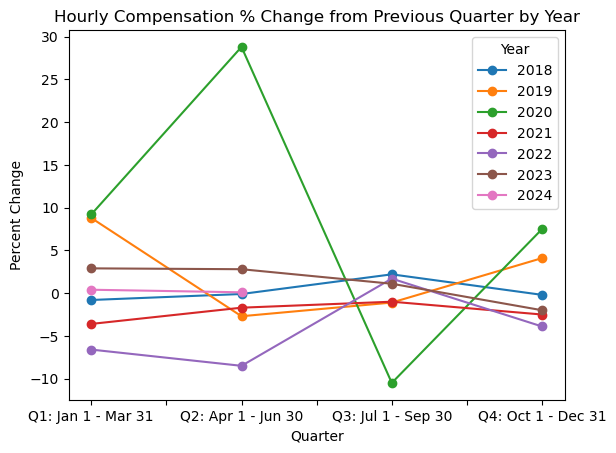

In [54]:
real_hourly_compensation_plot = real_hourly_compensation_df.pivot(index="quarter", columns="Year", values="percent_change")

plt.figure(figsize=(10, 6))
real_hourly_compensation_plot.plot(marker="o")

plt.xlabel("Quarter")
plt.ylabel("Percent Change")
plt.title("Hourly Compensation % Change from Previous Quarter by Year")